## Initial Data Exploration 

The goal is to load and explore the data sets. 

### Documentation

* [`csse_covid_19_daily_reports_us`](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data#time-series-summary-csse_covid_19_time_series)
* [`cdc_death_counts_by_sex_age_state`](https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-Sex-and-Age/9bhg-hcku)
* [`cdc_death_counts_by_conditions`](https://data.cdc.gov/NCHS/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/hk9y-quqm)

In [1]:
# pandas and numpy for working with data
import pandas as pd 
import numpy as np

# seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
# load in the data frames 
#deaths_by_cond = pd.read_csv("../data/cdc_death_counts_by_conditions.csv")
#deaths_by_feature = pd.read_csv("../data/cdc_death_counts_by_sex_age_state.csv")
daily_reports = pd.read_csv("../data/csse_covid_19_daily_reports_us.csv")

In [179]:
daily_reports.sample(5)

Province_State Country_Region          Last_Update      Lat     Long_  \
14104            Utah             US  2020-09-12 04:30:24  40.1500 -111.8624   
9688           Oregon             US  2020-06-28 04:34:18  44.5720 -122.0709   
16990        New York             US  2020-11-01 04:39:05  42.1657  -74.9481   
2090   American Samoa             US  2021-02-07 05:30:57 -14.2710 -170.1320   
5053      Connecticut             US  2021-03-30 04:31:00  41.5978  -72.7554   

       Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
14104      56675     431    48021.0    8223.0  49.0    1767.802323   
9688        8094     202     2649.0    5243.0  41.0     191.903857   
16990     511761   33730    79717.0  394315.0  36.0    2608.997910   
2090           0       0        NaN       0.0  60.0       0.000000   
5053      308439    7883        NaN       NaN   9.0    8651.168896   

       Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio  \
14104                 NaN                  NaN                  NaN   
9688                  NaN               1022.0                  NaN   
16990                 NaN                  NaN                  NaN   
2090               2140.0                  NaN                  NaN   
5053            7076592.0                  NaN             2.555773   

              UID ISO3   Testing_Rate  Hospitalization_Rate  People_Tested  \
14104  84000049.0  USA   22077.862530                   NaN       707807.0   
9688   84000041.0  USA    5141.809458             12.626637       216868.0   
16990  84000036.0  USA   74678.964946                   NaN     14527718.0   
2090         16.0  ASM    3846.084722                   NaN            NaN   
5053   84000009.0  USA  198485.900294                   NaN            NaN   

       Mortality_Rate  
14104        0.760476  
9688         2.495676  
16990        6.602593  
2090              NaN  
5053              NaN

In [185]:
daily_reports['US_Eastern_Last_Update'] = pd.to_datetime(daily_reports.loc[:,'Last_Update'], utc=True).dt.tz_convert('US/Eastern')
daily_reports['Date_Last_Update'] = daily_reports['US_Eastern_Last_Update'].dt.date
daily_reports[['Province_State','Last_Update','US_Eastern_Last_Update','Date_Last_Update']].sample(10)

Province_State          Last_Update    US_Eastern_Last_Update  \
10822                 Idaho  2020-07-18 04:34:58 2020-07-18 00:34:58-04:00   
7789                Wyoming  2020-05-26 02:32:41 2020-05-25 22:32:41-04:00   
8840               Colorado  2020-06-14 03:33:28 2020-06-13 23:33:28-04:00   
11311              Oklahoma  2020-07-26 04:35:13 2020-07-26 00:35:13-04:00   
10356                  Guam  2020-07-10 04:34:42 2020-07-10 00:34:42-04:00   
18498              New York  2020-11-27 05:30:26 2020-11-27 00:30:26-05:00   
2504   District of Columbia  2021-02-14 05:30:42 2021-02-14 00:30:42-05:00   
13755                 Texas  2020-09-06 04:30:30 2020-09-06 00:30:30-04:00   
10147        North Carolina  2020-07-06 04:34:10 2020-07-06 00:34:10-04:00   
4113               Virginia  2021-03-13 05:30:48 2021-03-13 00:30:48-05:00   

      Date_Last_Update  
10822       2020-07-18  
7789        2020-05-25  
8840        2020-06-13  
11311       2020-07-26  
10356       2020-07-10  
18498       2020-11-27  
2504        2021-02-14  
13755       2020-09-06  
10147       2020-07-06  
4113        2021-03-13

In [163]:
cal_daily_reports = daily_reports[daily_reports["Province_State"]=="California"]

In [164]:
cal_daily_reports.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
5       California             US  2021-01-02 05:30:44  36.1162 -119.6816   
63      California             US  2021-01-03 05:30:33  36.1162 -119.6816   
121     California             US  2021-01-04 05:30:45  36.1162 -119.6816   
179     California             US  2021-01-05 05:30:33  36.1162 -119.6816   
237     California             US  2021-01-06 05:30:39  36.1162 -119.6816   

     Confirmed  Deaths  Recovered     Active  FIPS  ...  Total_Test_Results  \
5      2365024   26363        NaN  2309915.0   6.0  ...          33058311.0   
63     2415246   26551        NaN  2362015.0   6.0  ...          33391442.0   
121    2452262   26638        NaN  2400292.0   6.0  ...          33812786.0   
179    2490518   27017        NaN  2431220.0   6.0  ...          34127013.0   
237    2529480   27519        NaN  2468414.0   6.0  ...          34330784.0   

     People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  Testing_Rate  \
5                    NaN             1.125160  84000006.0   USA  83666.036710   
63                   NaN             1.111215  84000006.0   USA  84509.145436   
121                  NaN             1.097601  84000006.0   USA  85575.509128   
179                  NaN             1.093528  84000006.0   USA  86370.774431   
237                  NaN             1.097838  84000006.0   USA  86886.490796   

     Hospitalization_Rate  People_Tested  Mortality_Rate  Date_Last_Update  
5                     NaN            NaN             NaN        2021-01-02  
63                    NaN            NaN             NaN        2021-01-03  
121                   NaN            NaN             NaN        2021-01-04  
179                   NaN            NaN             NaN        2021-01-05  
237                   NaN            NaN             NaN        2021-01-06  

[5 rows x 21 columns]

In [7]:
#verify all the same lat/long for california 
cal_daily_reports[['Lat','Long_']].value_counts()

Lat      Long_    
36.1162  -119.6816    354
dtype: int64

In [8]:
# double check data was correctly converted to datetime
cal_daily_reports[['Date_Last_Update','Last_Update']].head()

Date_Last_Update          Last_Update
5         2021-01-02  2021-01-02 05:30:44
63        2021-01-03  2021-01-03 05:30:33
121       2021-01-04  2021-01-04 05:30:45
179       2021-01-05  2021-01-05 05:30:33
237       2021-01-06  2021-01-06 05:30:39

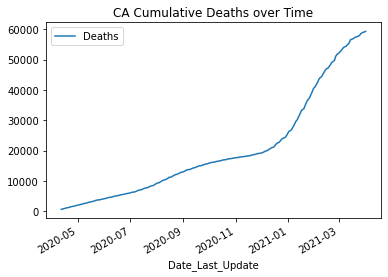

In [9]:
cal_daily_reports[["Date_Last_Update","Deaths"]].set_index("Date_Last_Update").plot(title="CA Cumulative Deaths over Time");

In [10]:
# inspect range of dates in the dataframe 
cal_daily_reports['Date_Last_Update'].describe(datetime_is_numeric=True)

count                              354
mean     2020-10-06 11:15:15.254237184
min                2020-04-12 00:00:00
25%                2020-07-10 06:00:00
50%                2020-10-06 12:00:00
75%                2021-01-02 18:00:00
max                2021-04-01 00:00:00
Name: Date_Last_Update, dtype: object

In [11]:
cal_daily_reports.loc[:,"Death_delta"] = cal_daily_reports.sort_values(by="Date_Last_Update").loc[:,'Deaths'].diff()
cal_daily_reports['Death_delta'].describe()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


count     353.000000
mean      166.101983
std       173.579301
min        -2.000000
25%        61.000000
50%        96.000000
75%       194.000000
max      1084.000000
Name: Death_delta, dtype: float64

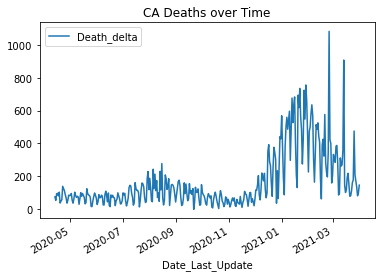

In [12]:
#plot changes in death rate over time 
cal_daily_reports[["Date_Last_Update","Death_delta"]].set_index("Date_Last_Update").plot(title="CA Deaths over Time");

In [13]:
def create_rolling_average_by_time(data, date_col, col_name, output_name, window_offset):
    temp_df = (data[[date_col,col_name]]
           .set_index(date_col)
           .sort_index()
           .rolling(window_offset).mean().reset_index()
           .rename(columns={col_name:output_name})
          )
    data = data.merge(temp_df, how="left", left_on=date_col, right_on=date_col)
    return data

cal_daily_reports = create_rolling_average_by_time(data=cal_daily_reports, date_col='Date_Last_Update',
                                                  col_name='Death_delta', output_name='Death_delta_rolling_avg_7D',
                                                   window_offset='7D')

In [14]:
cal_daily_reports.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0     California             US  2021-01-02 05:30:44  36.1162 -119.6816   
1     California             US  2021-01-03 05:30:33  36.1162 -119.6816   
2     California             US  2021-01-04 05:30:45  36.1162 -119.6816   
3     California             US  2021-01-05 05:30:33  36.1162 -119.6816   
4     California             US  2021-01-06 05:30:39  36.1162 -119.6816   

   Confirmed  Deaths  Recovered     Active  FIPS  ...  Case_Fatality_Ratio  \
0    2365024   26363        NaN  2309915.0   6.0  ...             1.125160   
1    2415246   26551        NaN  2362015.0   6.0  ...             1.111215   
2    2452262   26638        NaN  2400292.0   6.0  ...             1.097601   
3    2490518   27017        NaN  2431220.0   6.0  ...             1.093528   
4    2529480   27519        NaN  2468414.0   6.0  ...             1.097838   

          UID  ISO3  Testing_Rate  Hospitalization_Rate People_Tested  \
0  84000006.0   USA  83666.036710                   NaN           NaN   
1  84000006.0   USA  84509.145436                   NaN           NaN   
2  84000006.0   USA  85575.509128                   NaN           NaN   
3  84000006.0   USA  86370.774431                   NaN           NaN   
4  84000006.0   USA  86886.490796                   NaN           NaN   

   Mortality_Rate  Date_Last_Update  Death_delta  Death_delta_rolling_avg_7D  
0             NaN        2021-01-02        377.0                  338.857143  
1             NaN        2021-01-03        188.0                  332.285714  
2             NaN        2021-01-04         87.0                  335.571429  
3             NaN        2021-01-05        379.0                  353.000000  
4             NaN        2021-01-06        502.0                  361.571429  

[5 rows x 23 columns]

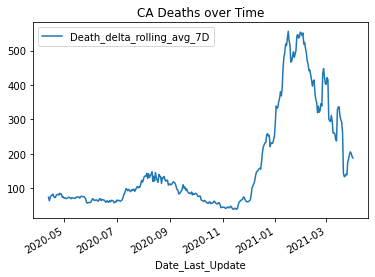

In [15]:
#compare with: https://www.nytimes.com/interactive/2021/us/california-covid-cases.html
cal_daily_reports[["Date_Last_Update","Death_delta_rolling_avg_7D"]].set_index("Date_Last_Update").plot(title="CA Deaths over Time");

In [16]:
daily_reports.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'People_Tested',
       'Mortality_Rate', 'Date_Last_Update'],
      dtype='object')

In [17]:
daily_reports[['Confirmed', 'Deaths', 'Recovered', 'Active',
               'Incident_Rate','Total_Test_Results','People_Hospitalized','Case_Fatality_Ratio',
              'Testing_Rate', 'Hospitalization_Rate', 'People_Tested', 'Mortality_Rate']]

Confirmed  Deaths  Recovered    Active  Incident_Rate  \
0         365747    4872   202137.0  158738.0    7459.375895   
1          46986     206     7165.0   39615.0    6422.844801   
2              0       0        NaN       0.0       0.000000   
3         530267    9015    76934.0  444318.0    7285.171274   
4         229442    3711   199247.0   26484.0    7602.945718   
...          ...     ...        ...       ...            ...   
20545     349584    5032    30707.0  313845.0    4095.638473   
20546     246752    3461        NaN  243291.0    3240.386963   
20547      85334    1338    59508.0   24488.0    4761.551368   
20548     520438    5242   447500.0   67696.0    8938.495481   
20549      44409     438    42570.0    1401.0    7673.142016   

       Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio  \
0               1885216.0                  NaN             1.332068   
1               1275750.0                  NaN             0.438428   
2                  2140.0                  NaN                  NaN   
3               5155330.0                  NaN             1.700087   
4               2051488.0                  NaN             1.617402   
...                   ...                  ...                  ...   
20545           4255991.0                  NaN             1.439425   
20546           3805390.0                  NaN             1.402623   
20547           1514520.0                  NaN             1.567957   
20548           5348488.0                  NaN             1.007229   
20549            501784.0                  NaN             0.986287   

        Testing_Rate  Hospitalization_Rate  People_Tested  Mortality_Rate  
0       38448.804196                   NaN            NaN             NaN  
1      174391.185778                   NaN            NaN             NaN  
2        3846.084722                   NaN            NaN             NaN  
3       39551.860582                   NaN            NaN             NaN  
4       67979.497674                   NaN            NaN             NaN  
...              ...                   ...            ...             ...  
20545   49862.123205                   NaN            NaN             NaN  
20546   49972.993711                   NaN            NaN             NaN  
20547   84508.692646                   NaN            NaN             NaN  
20548   91860.002192                   NaN            NaN             NaN  
20549   86699.990842                   NaN            NaN             NaN  

[20550 rows x 12 columns]

In [18]:
temp = daily_reports[['Confirmed', 'Deaths', 'Recovered', 'Active',
               'Incident_Rate','Total_Test_Results','People_Hospitalized','Case_Fatality_Ratio',
              'Testing_Rate', 'Hospitalization_Rate', 'People_Tested', 'Mortality_Rate']]
print("Number of non-NA values per column:")
temp.count().sort_values(ascending=False)*100/temp.shape[0]

Number of non-NA values per column:


Confirmed               100.000000
Deaths                  100.000000
Incident_Rate            96.467153
Testing_Rate             96.467153
Active                   92.861314
Recovered                73.586375
Mortality_Rate           58.525547
People_Tested            57.498783
Case_Fatality_Ratio      39.664234
Total_Test_Results       38.968370
People_Hospitalized      24.958637
Hospitalization_Rate     24.958637
dtype: float64

In [19]:
print("Number of unique values in 'Province_State':",daily_reports[['Province_State']].nunique())
daily_reports[['Province_State']].value_counts()
# Non-state entries 
# Northern Mariana Islands , Puerto Rico   , Virgin Islands  ,American Samoa  ,
# Diamond Princess , Grand Princess , Guam  , Recovered, District of Columbia 

Number of unique values in 'Province_State': Province_State    59
dtype: int64


Province_State          
Alabama                     354
Pennsylvania                354
Nebraska                    354
Nevada                      354
New Hampshire               354
New Jersey                  354
New Mexico                  354
New York                    354
North Carolina              354
North Dakota                354
Northern Mariana Islands    354
Ohio                        354
Oklahoma                    354
Oregon                      354
Puerto Rico                 354
Alaska                      354
Rhode Island                354
South Carolina              354
South Dakota                354
Tennessee                   354
Texas                       354
Utah                        354
Vermont                     354
Virgin Islands              354
Virginia                    354
Washington                  354
West Virginia               354
Wisconsin                   354
Montana                     354
Missouri                    354
Mississippi    

In [20]:
# seems to have fairly consistent data across time, basically just one entry with many dates
daily_reports[daily_reports['Province_State']=='Diamond Princess'].describe()

Lat  Long_  Confirmed  Deaths  Recovered  Active          FIPS  \
count  0.0    0.0      354.0   354.0       23.0   329.0    354.000000   
mean   NaN    NaN       49.0     0.0        0.0    49.0  88639.412429   
std    NaN    NaN        0.0     0.0        0.0     0.0   4677.147230   
min    NaN    NaN       49.0     0.0        0.0    49.0    888.000000   
25%    NaN    NaN       49.0     0.0        0.0    49.0  88888.000000   
50%    NaN    NaN       49.0     0.0        0.0    49.0  88888.000000   
75%    NaN    NaN       49.0     0.0        0.0    49.0  88888.000000   
max    NaN    NaN       49.0     0.0        0.0    49.0  88888.000000   

       Incident_Rate  Total_Test_Results  People_Hospitalized  \
count            0.0                 0.0                  0.0   
mean             NaN                 NaN                  NaN   
std              NaN                 NaN                  NaN   
min              NaN                 NaN                  NaN   
25%              NaN                 NaN                  NaN   
50%              NaN                 NaN                  NaN   
75%              NaN                 NaN                  NaN   
max              NaN                 NaN                  NaN   

       Case_Fatality_Ratio         UID  Testing_Rate  Hospitalization_Rate  \
count                143.0       354.0           0.0                   0.0   
mean                   0.0  84088888.0           NaN                   NaN   
std                    0.0         0.0           NaN                   NaN   
min                    0.0  84088888.0           NaN                   NaN   
25%                    0.0  84088888.0           NaN                   NaN   
50%                    0.0  84088888.0           NaN                   NaN   
75%                    0.0  84088888.0           NaN                   NaN   
max                    0.0  84088888.0           NaN                   NaN   

       People_Tested  Mortality_Rate  
count            0.0           211.0  
mean             NaN             0.0  
std              NaN             0.0  
min              NaN             0.0  
25%              NaN             0.0  
50%              NaN             0.0  
75%              NaN             0.0  
max              NaN             0.0

In [21]:
daily_reports[daily_reports['Province_State']=='Diamond Princess'].head()

Province_State Country_Region          Last_Update  Lat  Long_  \
9    Diamond Princess             US  2021-01-02 05:30:44  NaN    NaN   
67   Diamond Princess             US  2021-01-03 05:30:33  NaN    NaN   
125  Diamond Princess             US  2021-01-04 05:30:45  NaN    NaN   
183  Diamond Princess             US  2021-01-05 05:30:33  NaN    NaN   
241  Diamond Princess             US  2021-01-06 05:30:39  NaN    NaN   

     Confirmed  Deaths  Recovered  Active     FIPS  ...  Total_Test_Results  \
9           49       0        NaN    49.0  88888.0  ...                 NaN   
67          49       0        NaN    49.0  88888.0  ...                 NaN   
125         49       0        NaN    49.0  88888.0  ...                 NaN   
183         49       0        NaN    49.0  88888.0  ...                 NaN   
241         49       0        NaN    49.0  88888.0  ...                 NaN   

     People_Hospitalized  Case_Fatality_Ratio         UID  ISO3 Testing_Rate  \
9                    NaN                  0.0  84088888.0   USA          NaN   
67                   NaN                  0.0  84088888.0   USA          NaN   
125                  NaN                  0.0  84088888.0   USA          NaN   
183                  NaN                  0.0  84088888.0   USA          NaN   
241                  NaN                  0.0  84088888.0   USA          NaN   

     Hospitalization_Rate  People_Tested  Mortality_Rate  Date_Last_Update  
9                     NaN            NaN             NaN        2021-01-02  
67                    NaN            NaN             NaN        2021-01-03  
125                   NaN            NaN             NaN        2021-01-04  
183                   NaN            NaN             NaN        2021-01-05  
241                   NaN            NaN             NaN        2021-01-06  

[5 rows x 21 columns]

In [22]:
daily_reports[daily_reports['Province_State']=='Grand Princess'].nunique()

Province_State            1
Country_Region            1
Last_Update             354
Lat                       0
Long_                     0
Confirmed                 1
Deaths                    2
Recovered                 1
Active                    2
FIPS                      2
Incident_Rate             0
Total_Test_Results        0
People_Hospitalized       0
Case_Fatality_Ratio       1
UID                       1
ISO3                      1
Testing_Rate              0
Hospitalization_Rate      0
People_Tested             0
Mortality_Rate            3
Date_Last_Update        354
dtype: int64

In [23]:
daily_reports[daily_reports['Province_State']=='Recovered'].describe()

Lat  Long_  Confirmed  Deaths      Recovered         Active  FIPS  \
count  0.0    0.0       18.0    18.0      18.000000      18.000000   0.0   
mean   NaN    NaN        0.0     0.0   76909.722222  -76909.722222   NaN   
std    NaN    NaN        0.0     0.0   26729.905721   26729.905721   NaN   
min    NaN    NaN        0.0     0.0   32988.000000 -120720.000000   NaN   
25%    NaN    NaN        0.0     0.0   55663.500000 -100048.750000   NaN   
50%    NaN    NaN        0.0     0.0   73766.500000  -73766.500000   NaN   
75%    NaN    NaN        0.0     0.0  100048.750000  -55663.500000   NaN   
max    NaN    NaN        0.0     0.0  120720.000000  -32988.000000   NaN   

       Incident_Rate  Total_Test_Results  People_Hospitalized  \
count            0.0                 0.0                  0.0   
mean             NaN                 NaN                  NaN   
std              NaN                 NaN                  NaN   
min              NaN                 NaN                  NaN   
25%              NaN                 NaN                  NaN   
50%              NaN                 NaN                  NaN   
75%              NaN                 NaN                  NaN   
max              NaN                 NaN                  NaN   

       Case_Fatality_Ratio         UID  Testing_Rate  Hospitalization_Rate  \
count                  0.0        18.0           0.0                   0.0   
mean                   NaN  84070001.0           NaN                   NaN   
std                    NaN         0.0           NaN                   NaN   
min                    NaN  84070001.0           NaN                   NaN   
25%                    NaN  84070001.0           NaN                   NaN   
50%                    NaN  84070001.0           NaN                   NaN   
75%                    NaN  84070001.0           NaN                   NaN   
max                    NaN  84070001.0           NaN                   NaN   

       People_Tested  Mortality_Rate  
count            0.0             0.0  
mean             NaN             NaN  
std              NaN             NaN  
min              NaN             NaN  
25%              NaN             NaN  
50%              NaN             NaN  
75%              NaN             NaN  
max              NaN             NaN

In [24]:
daily_reports[daily_reports['UID']==84070001]

Province_State Country_Region          Last_Update  Lat  Long_  \
5277      Recovered             US                  NaN  NaN    NaN   
5337      Recovered             US                  NaN  NaN    NaN   
5396      Recovered             US                  NaN  NaN    NaN   
5455      Recovered             US                  NaN  NaN    NaN   
5514      Recovered             US                  NaN  NaN    NaN   
5573      Recovered             US                  NaN  NaN    NaN   
5632      Recovered             US                  NaN  NaN    NaN   
5691      Recovered             US                  NaN  NaN    NaN   
5750      Recovered             US                  NaN  NaN    NaN   
5809      Recovered             US  2020-04-21 23:40:34  NaN    NaN   
5868      Recovered             US  2020-04-22 23:40:26  NaN    NaN   
5927      Recovered             US  2020-04-24 03:33:00  NaN    NaN   
5986      Recovered             US  2020-04-25 06:32:46  NaN    NaN   
6045      Recovered             US  2020-04-26 02:32:45  NaN    NaN   
6104      Recovered             US  2020-04-27 02:32:46  NaN    NaN   
6163      Recovered             US  2020-04-28 02:32:46  NaN    NaN   
6222      Recovered             US  2020-04-29 02:32:33  NaN    NaN   
6281      Recovered             US  2020-04-30 02:32:31  NaN    NaN   

      Confirmed  Deaths  Recovered    Active  FIPS  ...  Total_Test_Results  \
5277          0       0    32988.0  -32988.0   NaN  ...                 NaN   
5337          0       0    43482.0  -43482.0   NaN  ...                 NaN   
5396          0       0    47763.0  -47763.0   NaN  ...                 NaN   
5455          0       0    52096.0  -52096.0   NaN  ...                 NaN   
5514          0       0    54703.0  -54703.0   NaN  ...                 NaN   
5573          0       0    58545.0  -58545.0   NaN  ...                 NaN   
5632          0       0    64840.0  -64840.0   NaN  ...                 NaN   
5691          0       0    70337.0  -70337.0   NaN  ...                 NaN   
5750          0       0    72329.0  -72329.0   NaN  ...                 NaN   
5809          0       0    75204.0  -75204.0   NaN  ...                 NaN   
5868          0       0    77366.0  -77366.0   NaN  ...                 NaN   
5927          0       0    80203.0  -80203.0   NaN  ...                 NaN   
5986          0       0    99079.0  -99079.0   NaN  ...                 NaN   
6045          0       0   100372.0 -100372.0   NaN  ...                 NaN   
6104          0       0   106988.0 -106988.0   NaN  ...                 NaN   
6163          0       0   111424.0 -111424.0   NaN  ...                 NaN   
6222          0       0   115936.0 -115936.0   NaN  ...                 NaN   
6281          0       0   120720.0 -120720.0   NaN  ...                 NaN   

      People_Hospitalized  Case_Fatality_Ratio         UID  ISO3 Testing_Rate  \
5277                  NaN                  NaN  84070001.0   USA          NaN   
5337                  NaN                  NaN  84070001.0   USA          NaN   
5396                  NaN                  NaN  84070001.0   USA          NaN   
5455                  NaN                  NaN  84070001.0   USA          NaN   
5514                  NaN                  NaN  84070001.0   USA          NaN   
5573                  NaN                  NaN  84070001.0   USA          NaN   
5632                  NaN                  NaN  84070001.0   USA          NaN   
5691                  NaN                  NaN  84070001.0   USA          NaN   
5750                  NaN                  NaN  84070001.0   USA          NaN   
5809                  NaN                  NaN  84070001.0   USA          NaN   
5868                  NaN                  NaN  84070001.0   USA          NaN   
5927                  NaN                  NaN  84070001.0   USA          NaN   
5986                  NaN                  NaN  84070001.0   USA          NaN   
6045               

In [25]:
first_date = daily_reports[['Province_State','Date_Last_Update']].groupby("Province_State").agg(min)#.value_counts()
last_date = daily_reports[['Province_State','Date_Last_Update']].groupby("Province_State").agg(max)#.value_counts()
first_date[first_date['Date_Last_Update'].isin([pd.to_datetime('2020-04-13'),pd.to_datetime('2020-04-21')])]

Date_Last_Update
Province_State                 
American Samoa       2020-04-21
Recovered            2020-04-21
Virgin Islands       2020-04-13

In [26]:
daily_reports[['Province_State','Date_Last_Update']].groupby("Province_State").agg(max).value_counts()

Date_Last_Update
2021-04-01          58
2020-04-30           1
dtype: int64

In [27]:
pd.to_datetime('2021-04-01') - pd.to_datetime('2020-04-12')

Timedelta('354 days 00:00:00')

In [28]:
last_date.value_counts()

Date_Last_Update
2021-04-01          58
2020-04-30           1
dtype: int64

In [29]:
last_date.loc[['American Samoa', 'Recovered','Virgin Islands'],:]

Date_Last_Update
Province_State                 
American Samoa       2021-04-01
Recovered            2020-04-30
Virgin Islands       2021-04-01

In [30]:
print(daily_reports[daily_reports['Province_State']=='American Samoa']['Date_Last_Update'].nunique())
print(daily_reports[daily_reports['Province_State']=='American Samoa']['Date_Last_Update'].shape[0])

345
354


In [31]:
# 9 rows without dates... 
daily_reports[daily_reports['Province_State']=='American Samoa']['Last_Update'].isna().value_counts()

False    345
True       9
Name: Last_Update, dtype: int64

In [32]:
# some rows to remove without dates 
daily_reports[(daily_reports['Province_State']=='American Samoa') & (daily_reports['Last_Update'].isna())]

Province_State Country_Region Last_Update     Lat     Long_  Confirmed  \
5275  American Samoa             US         NaN -14.271 -170.1322          0   
5281  American Samoa             US         NaN -14.271 -170.1320          0   
5340  American Samoa             US         NaN -14.271 -170.1320          0   
5399  American Samoa             US         NaN -14.271 -170.1320          0   
5458  American Samoa             US         NaN -14.271 -170.1320          0   
5517  American Samoa             US         NaN -14.271 -170.1320          0   
5576  American Samoa             US         NaN -14.271 -170.1320          0   
5635  American Samoa             US         NaN -14.271 -170.1320          0   
5694  American Samoa             US         NaN -14.271 -170.1320          0   

      Deaths  Recovered  Active  FIPS  ...  Total_Test_Results  \
5275       0        NaN     0.0  60.0  ...                 NaN   
5281       0        NaN     NaN  60.0  ...                 NaN   
5340       0        NaN     NaN  60.0  ...                 NaN   
5399       0        NaN     NaN  60.0  ...                 NaN   
5458       0        NaN     NaN  60.0  ...                 NaN   
5517       0        NaN     NaN  60.0  ...                 NaN   
5576       0        NaN     NaN  60.0  ...                 NaN   
5635       0        NaN     NaN  60.0  ...                 NaN   
5694       0        NaN     NaN  60.0  ...                 NaN   

      People_Hospitalized  Case_Fatality_Ratio   UID  ISO3 Testing_Rate  \
5275                  NaN                  NaN  16.0   ASM     5.391708   
5281                  NaN                  NaN  16.0   ASM     5.391708   
5340                  NaN                  NaN  16.0   ASM     5.391708   
5399                  NaN                  NaN  16.0   ASM     5.391708   
5458                  NaN                  NaN  16.0   ASM     5.391708   
5517                  NaN                  NaN  16.0   ASM     5.391708   
5576                  NaN                  NaN  16.0   ASM     5.391708   
5635                  NaN                  NaN  16.0   ASM     5.391708   
5694                  NaN                  NaN  16.0   ASM     5.391708   

      Hospitalization_Rate  People_Tested  Mortality_Rate  Date_Last_Update  
5275                   NaN            3.0             NaN               NaT  
5281                   NaN            3.0             NaN               NaT  
5340                   NaN            3.0             NaN               NaT  
5399                   NaN            3.0             NaN               NaT  
5458                   NaN            3.0             NaN               NaT  
5517                   NaN            3.0             NaN               NaT  
5576                   NaN            3.0             NaN               NaT  
5635                   NaN            3.0             NaN               NaT  
5694                   NaN            3.0             NaN               NaT  

[9 rows x 21 columns]

In [33]:
daily_reports[daily_reports['Last_Update'].isna()].sort_values(by='Province_State')

Province_State Country_Region Last_Update      Lat     Long_  Confirmed  \
5275  American Samoa             US         NaN -14.2710 -170.1322          0   
5635  American Samoa             US         NaN -14.2710 -170.1320          0   
5576  American Samoa             US         NaN -14.2710 -170.1320          0   
5517  American Samoa             US         NaN -14.2710 -170.1320          0   
5694  American Samoa             US         NaN -14.2710 -170.1320          0   
5399  American Samoa             US         NaN -14.2710 -170.1320          0   
5458  American Samoa             US         NaN -14.2710 -170.1320          0   
5340  American Samoa             US         NaN -14.2710 -170.1320          0   
5281  American Samoa             US         NaN -14.2710 -170.1320          0   
5455       Recovered             US         NaN      NaN       NaN          0   
5337       Recovered             US         NaN      NaN       NaN          0   
5514       Recovered             US         NaN      NaN       NaN          0   
5573       Recovered             US         NaN      NaN       NaN          0   
5632       Recovered             US         NaN      NaN       NaN          0   
5277       Recovered             US         NaN      NaN       NaN          0   
5691       Recovered             US         NaN      NaN       NaN          0   
5396       Recovered             US         NaN      NaN       NaN          0   
5750       Recovered             US         NaN      NaN       NaN          0   
5278  Virgin Islands             US         NaN  18.3358  -64.8963         51   

      Deaths  Recovered   Active  FIPS  ...  Total_Test_Results  \
5275       0        NaN      0.0  60.0  ...                 NaN   
5635       0        NaN      NaN  60.0  ...                 NaN   
5576       0        NaN      NaN  60.0  ...                 NaN   
5517       0        NaN      NaN  60.0  ...                 NaN   
5694       0        NaN      NaN  60.0  ...                 NaN   
5399       0        NaN      NaN  60.0  ...                 NaN   
5458       0        NaN      NaN  60.0  ...                 NaN   
5340       0        NaN      NaN  60.0  ...                 NaN   
5281       0        NaN      NaN  60.0  ...                 NaN   
5455       0    52096.0 -52096.0   NaN  ...                 NaN   
5337       0    43482.0 -43482.0   NaN  ...                 NaN   
5514       0    54703.0 -54703.0   NaN  ...                 NaN   
5573       0    58545.0 -58545.0   NaN  ...                 NaN   
5632       0    64840.0 -64840.0   NaN  ...                 NaN   
5277       0    32988.0 -32988.0   NaN  ...                 NaN   
5691       0    70337.0 -70337.0   NaN  ...                 NaN   
5396       0    47763.0 -47763.0   NaN  ...                 NaN   
5750       0    72329.0 -72329.0   NaN  ...                 NaN   
5278       1       43.0     50.0   NaN  ...                 NaN   

      People_Hospitalized  Case_Fatality_Ratio         UID  ISO3 Testing_Rate  \
5275                  NaN                  NaN        16.0   ASM     5.391708   
5635                  NaN                  NaN        16.0   ASM     5.391708   
5576                  NaN                  NaN        16.0   ASM     5.391708   
5517                  NaN                  NaN        16.0   ASM     5.391708   
5694                  NaN                  NaN        16.0   ASM     5.391708   
5399                  NaN                  NaN        16.0   ASM     5.391708   
5458                  NaN                  NaN        16.0   ASM     5.391708   
5340                  NaN                  NaN        16.0   ASM     5.391708   
5281                  NaN                  NaN        16.0   ASM     5.391708   
5455                  NaN                  NaN  84070001.0   USA          NaN   
5337                  NaN                  NaN  84070001.0   USA          NaN   
5514                  NaN                  NaN  84070001.0   USA        

In [34]:
# one row without last_update time... 
daily_reports[daily_reports['Province_State']=='Virgin Islands'].sort_values(by='Last_Update')

Province_State Country_Region          Last_Update      Lat    Long_  \
5331  Virgin Islands             US  2020-04-13 23:07:54  18.3358 -64.8963   
5390  Virgin Islands             US  2020-04-14 23:33:31  18.3358 -64.8963   
5449  Virgin Islands             US  2020-04-15 22:56:51  18.3358 -64.8963   
5508  Virgin Islands             US  2020-04-16 23:30:51  18.3358 -64.8963   
5567  Virgin Islands             US  2020-04-17 23:30:52  18.3358 -64.8963   
...              ...            ...                  ...      ...      ...   
5040  Virgin Islands             US  2021-03-29 04:31:08  18.3358 -64.8963   
5098  Virgin Islands             US  2021-03-30 04:31:00  18.3358 -64.8963   
5156  Virgin Islands             US  2021-03-31 04:31:15  18.3358 -64.8963   
5214  Virgin Islands             US  2021-04-01 04:30:33  18.3358 -64.8963   
5278  Virgin Islands             US                  NaN  18.3358 -64.8963   

      Confirmed  Deaths  Recovered  Active  FIPS  ...  Total_Test_Results  \
5331         51       1       43.0    50.0  78.0  ...                 NaN   
5390         51       1       44.0    50.0  78.0  ...                 NaN   
5449         51       1       44.0    50.0  78.0  ...                 NaN   
5508         51       1       46.0    50.0  78.0  ...                 NaN   
5567         51       2       46.0    49.0  78.0  ...                 NaN   
...         ...     ...        ...     ...   ...  ...                 ...   
5040       2907      26        NaN     NaN  78.0  ...             70001.0   
5098       2907      26        NaN     NaN  78.0  ...             70342.0   
5156       2907      26        NaN     NaN  78.0  ...             70658.0   
5214       2907      26        NaN     NaN  78.0  ...             70658.0   
5278         51       1       43.0    50.0   NaN  ...                 NaN   

      People_Hospitalized  Case_Fatality_Ratio    UID  ISO3  Testing_Rate  \
5331                  NaN                  NaN  850.0   VIR    347.727188   
5390                  NaN                  NaN  850.0   VIR    351.456166   
5449                  NaN                  NaN  850.0   VIR    356.117388   
5508                  NaN                  NaN  850.0   VIR    380.355744   
5567                  NaN                  NaN  850.0   VIR    395.271656   
...                   ...                  ...    ...   ...           ...   
5040                  NaN             0.894393  850.0   VIR  65258.045270   
5098                  NaN             0.894393  850.0   VIR  65575.940635   
5156                  NaN             0.894393  850.0   VIR  65870.529888   
5214                  NaN             0.894393  850.0   VIR  65870.529888   
5278                  3.0                  NaN  850.0   VIR    326.285565   

      Hospitalization_Rate  People_Tested  Mortality_Rate  Date_Last_Update  
5331                   NaN          373.0        1.960784        2020-04-13  
5390                   NaN          377.0        1.960784        2020-04-14  
5449                   NaN          382.0        1.960784        2020-04-15  
5508                   NaN          408.0        1.960784        2020-04-16  
5567                   NaN          424.0        3.921569        2020-04-17  
...                    ...            ...             ...               ...  
5040                   NaN            NaN             NaN        2021-03-29  
5098                   NaN            NaN             NaN        2021-03-30  
5156                   NaN            NaN             NaN        2021-03-31  
5214                   NaN            NaN             NaN        2021-04-01  
5278              5.882353          350.0        1.960784               NaT  

[354 rows x 21 columns]

In [37]:
daily_reports[['Province_State', 'Date_Last_Update']].head()

Province_State Date_Last_Update
0         Alabama       2021-01-02
1          Alaska       2021-01-02
2  American Samoa       2021-01-02
3         Arizona       2021-01-02
4        Arkansas       2021-01-02

In [187]:
excluded_regions = ['Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'American Samoa', # territories
                    'Diamond Princess', 'Grand Princess', 'Guam', 'Recovered', # other 
                    'Alaska', 'Hawaii'] # non continuous states
continguous_US = list(set(list(daily_reports['Province_State'].unique())) - set(excluded_regions))
assert len(continguous_US) == 49 # 50 states + DC - Hawaii, Alaska

cont_daily_reports = daily_reports[daily_reports['Province_State'].isin(continguous_US)]
cont_daily_reports.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0        Alabama             US  2021-01-02 05:30:44  32.3182  -86.9023   
3        Arizona             US  2021-01-02 05:30:44  33.7298 -111.4312   
4       Arkansas             US  2021-01-02 05:30:44  34.9697  -92.3731   
5     California             US  2021-01-02 05:30:44  36.1162 -119.6816   
6       Colorado             US  2021-01-02 05:30:44  39.0598 -105.3111   

   Confirmed  Deaths  Recovered     Active  FIPS  ...  People_Hospitalized  \
0     365747    4872   202137.0   158738.0   1.0  ...                  NaN   
3     530267    9015    76934.0   444318.0   4.0  ...                  NaN   
4     229442    3711   199247.0    26484.0   5.0  ...                  NaN   
5    2365024   26363        NaN  2309915.0   6.0  ...                  NaN   
6     337161    4873    18102.0   314186.0   8.0  ...                  NaN   

   Case_Fatality_Ratio         UID  ISO3  Testing_Rate Hospitalization_Rate  \
0             1.332068  84000001.0   USA  38448.804196                  NaN   
3             1.700087  84000004.0   USA  39551.860582                  NaN   
4             1.617402  84000005.0   USA  67979.497674                  NaN   
5             1.125160  84000006.0   USA  83666.036710                  NaN   
6             1.445304  84000008.0   USA  77173.289416                  NaN   

   People_Tested  Mortality_Rate    US_Eastern_Last_Update  Date_Last_Update  
0            NaN             NaN 2021-01-02 00:30:44-05:00        2021-01-02  
3            NaN             NaN 2021-01-02 00:30:44-05:00        2021-01-02  
4            NaN             NaN 2021-01-02 00:30:44-05:00        2021-01-02  
5            NaN             NaN 2021-01-02 00:30:44-05:00        2021-01-02  
6            NaN             NaN 2021-01-02 00:30:44-05:00        2021-01-02  

[5 rows x 22 columns]

In [40]:
cont_daily_reports[['Province_State', 'Date_Last_Update']].groupby('Province_State')

In [41]:
sample_group = cont_daily_reports[cont_daily_reports['Province_State']=='California']
sample_group.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
5       California             US  2021-01-02 05:30:44  36.1162 -119.6816   
63      California             US  2021-01-03 05:30:33  36.1162 -119.6816   
121     California             US  2021-01-04 05:30:45  36.1162 -119.6816   
179     California             US  2021-01-05 05:30:33  36.1162 -119.6816   
237     California             US  2021-01-06 05:30:39  36.1162 -119.6816   

     Confirmed  Deaths  Recovered     Active  FIPS  ...  Total_Test_Results  \
5      2365024   26363        NaN  2309915.0   6.0  ...          33058311.0   
63     2415246   26551        NaN  2362015.0   6.0  ...          33391442.0   
121    2452262   26638        NaN  2400292.0   6.0  ...          33812786.0   
179    2490518   27017        NaN  2431220.0   6.0  ...          34127013.0   
237    2529480   27519        NaN  2468414.0   6.0  ...          34330784.0   

     People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  Testing_Rate  \
5                    NaN             1.125160  84000006.0   USA  83666.036710   
63                   NaN             1.111215  84000006.0   USA  84509.145436   
121                  NaN             1.097601  84000006.0   USA  85575.509128   
179                  NaN             1.093528  84000006.0   USA  86370.774431   
237                  NaN             1.097838  84000006.0   USA  86886.490796   

     Hospitalization_Rate  People_Tested  Mortality_Rate  Date_Last_Update  
5                     NaN            NaN             NaN        2021-01-02  
63                    NaN            NaN             NaN        2021-01-03  
121                   NaN            NaN             NaN        2021-01-04  
179                   NaN            NaN             NaN        2021-01-05  
237                   NaN            NaN             NaN        2021-01-06  

[5 rows x 21 columns]

In [63]:
ca_day_diffs = sample_group[['Date_Last_Update']].sort_values(by='Date_Last_Update').diff().rename(columns={'Date_Last_Update':'Days Diff'})#.value_counts()
sample_group_with_day_diffs = ca_day_diffs.merge(sample_group, how="inner", left_index=True, right_index=True)[['Days Diff','Province_State','Last_Update','Date_Last_Update']]
sample_group_with_day_diffs.head()

Days Diff Province_State          Last_Update Date_Last_Update
5224       NaT     California  2020-04-12 23:18:15       2020-04-12
5284    1 days     California  2020-04-13 23:07:54       2020-04-13
5343    1 days     California  2020-04-14 23:33:31       2020-04-14
5402    1 days     California  2020-04-15 22:56:51       2020-04-15
5461    1 days     California  2020-04-16 23:30:51       2020-04-16

In [65]:
sample_group_with_day_diffs['Days Diff']

5224      NaT
5284   1 days
5343   1 days
5402   1 days
5461   1 days
        ...  
4935   1 days
4993   1 days
5051   1 days
5109   1 days
5167   1 days
Name: Days Diff, Length: 354, dtype: timedelta64[ns]

In [70]:
sample_group_with_day_diffs[sample_group_with_day_diffs['Days Diff']!=pd.Timedelta('1D')]

Days Diff Province_State          Last_Update Date_Last_Update
5224       NaT     California  2020-04-12 23:18:15       2020-04-12
5874    2 days     California  2020-04-24 03:33:00       2020-04-24

In [69]:
sample_group_with_day_diffs[(sample_group_with_day_diffs['Date_Last_Update'] >= pd.to_datetime('2020-04-20')) & (sample_group_with_day_diffs['Date_Last_Update'] <= pd.to_datetime('2020-04-30'))]

Days Diff Province_State          Last_Update Date_Last_Update
5697    1 days     California  2020-04-20 23:36:47       2020-04-20
5756    1 days     California  2020-04-21 23:40:34       2020-04-21
5815    1 days     California  2020-04-22 23:40:26       2020-04-22
5874    2 days     California  2020-04-24 03:33:00       2020-04-24
5933    1 days     California  2020-04-25 06:32:46       2020-04-25
5992    1 days     California  2020-04-26 02:32:45       2020-04-26
6051    1 days     California  2020-04-27 02:32:46       2020-04-27
6110    1 days     California  2020-04-28 02:32:46       2020-04-28
6169    1 days     California  2020-04-29 02:32:33       2020-04-29
6228    1 days     California  2020-04-30 02:32:31       2020-04-30

In [188]:
def extract_unusual_day_diffs(data):
    sorted_data = data.sort_values('Date_Last_Update')
    day_diffs = sorted_data[['Date_Last_Update']].diff().rename(columns={'Date_Last_Update':'Days_Diff'})
    sorted_data = sorted_data.merge(day_diffs, how="inner", left_index=True, right_index=True)
    unusual_date_diffs = sorted_data[(sorted_data['Days_Diff']!=pd.Timedelta('1D')) & (~ sorted_data['Days_Diff'].isna())]
    return unusual_date_diffs

In [167]:
extract_unusual_day_diffs(sample_group)

Province_State Country_Region          Last_Update      Lat     Long_  \
5874     California             US  2020-04-24 03:33:00  36.1162 -119.6816   

      Confirmed  Deaths  Recovered   Active  FIPS  ...  People_Hospitalized  \
5874      39946    1533        NaN  38028.0   6.0  ...               4929.0   

      Case_Fatality_Ratio         UID  ISO3  Testing_Rate  \
5874                  NaN  84000006.0   USA   1229.568906   

     Hospitalization_Rate  People_Tested  Mortality_Rate  Date_Last_Update  \
5874             12.45924       482097.0        3.875028        2020-04-24   

      Days_Diff  
5874     2 days  

[1 rows x 22 columns]

In [189]:
unusual_date_diff_data = cont_daily_reports.groupby('Province_State').apply(extract_unusual_day_diffs)
unusual_date_diff_data = unusual_date_diff_data.set_index(unusual_date_diff_data.index.droplevel('Province_State'))
unusual_date_diff_data.head()

Province_State Country_Region          Last_Update      Lat    Long_  \
5987        Alabama             US  2020-04-26 02:32:45  32.3182 -86.9023   
5928        Alabama             US  2020-04-25 06:32:46  32.3182 -86.9023   
8602        Alabama             US  2020-06-10 04:07:14  32.3182 -86.9023   
8660        Alabama             US  2020-06-11 03:33:54  32.3182 -86.9023   
8718        Alabama             US  2020-06-12 05:10:05  32.3182 -86.9023   

      Confirmed  Deaths  Recovered  Active  FIPS  ...  Case_Fatality_Ratio  \
5987       6274     209        NaN  5817.0   1.0  ...                  NaN   
5928       6092     209        NaN  5817.0   1.0  ...                  NaN   
8602      21834     729    11395.0  9298.0   1.0  ...                  NaN   
8660      22659     744    13508.0  7737.0   1.0  ...                  NaN   
8718      23370     755    13508.0  8582.0   1.0  ...                  NaN   

             UID  ISO3  Testing_Rate  Hospitalization_Rate People_Tested  \
5987  84000001.0   USA   1521.551870             13.923000       71344.0   
5928  84000001.0   USA   1127.962504             12.761367       52889.0   
8602  84000001.0   USA   5460.511892              9.742321      267739.0   
8660  84000001.0   USA   5568.972005              9.682114      273057.0   
8718  84000001.0   USA   5686.630221              9.476910      278826.0   

      Mortality_Rate    US_Eastern_Last_Update  Date_Last_Update  \
5987        3.468304 2020-04-25 22:32:45-04:00        2020-04-25   
5928        3.468304 2020-04-25 02:32:46-04:00        2020-04-25   
8602        3.403044 2020-06-10 00:07:14-04:00        2020-06-10   
8660        3.383510 2020-06-10 23:33:54-04:00        2020-06-10   
8718        3.304881 2020-06-12 01:10:05-04:00        2020-06-12   

            Days_Diff  
5987  2 days, 0:00:00  
5928          0:00:00  
8602  2 days, 0:00:00  
8660          0:00:00  
8718  2 days, 0:00:00  

[5 rows x 23 columns]

In [191]:
unusual_date_diff_data[['Province_State', 'Last_Update','US_Eastern_Last_Update','Date_Last_Update','Days_Diff']]

Province_State          Last_Update    US_Eastern_Last_Update  \
5987         Alabama  2020-04-26 02:32:45 2020-04-25 22:32:45-04:00   
5928         Alabama  2020-04-25 06:32:46 2020-04-25 02:32:46-04:00   
8602         Alabama  2020-06-10 04:07:14 2020-06-10 00:07:14-04:00   
8660         Alabama  2020-06-11 03:33:54 2020-06-10 23:33:54-04:00   
8718         Alabama  2020-06-12 05:10:05 2020-06-12 01:10:05-04:00   
...              ...                  ...                       ...   
9007         Wyoming  2020-06-16 04:33:22 2020-06-16 00:33:22-04:00   
14285        Wyoming  2020-09-15 03:30:30 2020-09-14 23:30:30-04:00   
14343        Wyoming  2020-09-16 04:30:32 2020-09-16 00:30:32-04:00   
3711         Wyoming  2021-03-06 04:30:38 2021-03-05 23:30:38-05:00   
3769         Wyoming  2021-03-07 05:31:30 2021-03-07 00:31:30-05:00   

      Date_Last_Update        Days_Diff  
5987        2020-04-25  2 days, 0:00:00  
5928        2020-04-25          0:00:00  
8602        2020-06-10  2 days, 0:00:00  
8660        2020-06-10          0:00:00  
8718        2020-06-12  2 days, 0:00:00  
...                ...              ...  
9007        2020-06-16  2 days, 0:00:00  
14285       2020-09-14          0:00:00  
14343       2020-09-16  2 days, 0:00:00  
3711        2021-03-05          0:00:00  
3769        2021-03-07  2 days, 0:00:00  

[537 rows x 5 columns]

In [170]:
#there are only 2 days that have weird values
# every state seems to make a jump at 2020-4-24
# florida has the additional oddity of two entries on 2020-04-14
unusual_date_diff_data['Date_Last_Update'].unique()

array([datetime.date(2020, 4, 25), datetime.date(2020, 6, 10),
       datetime.date(2020, 6, 12), datetime.date(2020, 6, 16),
       datetime.date(2020, 9, 14), datetime.date(2020, 9, 16),
       datetime.date(2021, 3, 5), datetime.date(2021, 3, 7)], dtype=object)

In [171]:
# there are 49 rows, which is one for every continental US state and DC. We don't worry about these 
unusual_date_diff_data[unusual_date_diff_data['Days_Diff'].isna()][['Province_State', 'Date_Last_Update','Days_Diff']]

Empty DataFrame
Columns: [Province_State, Date_Last_Update, Days_Diff]
Index: []

In [172]:
def data_between_dates(data, date_col='Date_Last_Update', start_date='2020-01-01', end_date='2021-04-03'):
    return data[(data[date_col] >= pd.to_datetime(start_date)) & (data[date_col] <= pd.to_datetime(end_date))]

In [174]:
data_between_dates(cont_daily_reports[cont_daily_reports['Province_State']=='Florida'][['Province_State','Last_Update','Date_Last_Update']], start_date='2020-04-10',end_date='2020-04-25')

Province_State          Last_Update Date_Last_Update
5230        Florida  2020-04-12 23:18:15       2020-04-12
5290        Florida  2020-04-14 00:42:00       2020-04-13
5349        Florida  2020-04-14 23:33:31       2020-04-14
5408        Florida  2020-04-15 22:56:51       2020-04-15
5467        Florida  2020-04-16 23:30:51       2020-04-16
5526        Florida  2020-04-17 23:30:52       2020-04-17
5585        Florida  2020-04-18 22:32:47       2020-04-18
5644        Florida  2020-04-19 23:41:01       2020-04-19
5703        Florida  2020-04-20 23:36:47       2020-04-20
5762        Florida  2020-04-21 23:40:34       2020-04-21
5821        Florida  2020-04-22 23:40:26       2020-04-22
5880        Florida  2020-04-24 03:33:00       2020-04-23
5939        Florida  2020-04-25 06:32:46       2020-04-25
5998        Florida  2020-04-26 02:32:45       2020-04-25

In [149]:
cont_daily_reports.sort_values(by='Date_Last_Update').tail(10)

Province_State Country_Region          Last_Update      Lat     Long_  \
5183       Kentucky             US  2021-04-01 04:30:33  37.6681  -84.6701   
5184      Louisiana             US  2021-04-01 04:30:33  31.1695  -91.8678   
5185          Maine             US  2021-04-01 04:30:33  44.6939  -69.3819   
5186       Maryland             US  2021-04-01 04:30:33  39.0639  -76.8021   
5187  Massachusetts             US  2021-04-01 04:30:33  42.2302  -71.5301   
5188       Michigan             US  2021-04-01 04:30:33  43.3266  -84.5361   
5189      Minnesota             US  2021-04-01 04:30:33  45.6945  -93.9002   
5190    Mississippi             US  2021-04-01 04:30:33  32.7416  -89.6787   
5179       Illinois             US  2021-04-01 04:30:33  40.3495  -88.9861   
5219        Wyoming             US  2021-04-01 04:30:33  42.7560 -107.3025   

      Confirmed  Deaths  Recovered  Active  FIPS  ...  Total_Test_Results  \
5183     426876    6090        NaN     NaN  21.0  ...           4186973.0   
5184     444933   10141        NaN     NaN  22.0  ...           6017582.0   
5185      50504     743        NaN     NaN  23.0  ...           1769462.0   
5186     411344    8286        NaN     NaN  24.0  ...           8738914.0   
5187     635580   17185        NaN     NaN  25.0  ...          18705555.0   
5188     746351   17119        NaN     NaN  26.0  ...          11456738.0   
5189     519529    6926        NaN     NaN  27.0  ...           7661261.0   
5190     305146    7032        NaN     NaN  28.0  ...           1832422.0   
5179    1244499   23579        NaN     NaN  17.0  ...          20235323.0   
5219      56310     700        NaN     NaN  56.0  ...            683766.0   

      People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  \
5183                  NaN             1.426644  84000021.0   USA   
5184                  NaN             2.279220  84000022.0   USA   
5185                  NaN             1.471171  84000023.0   USA   
5186                  NaN             2.014372  84000024.0   USA   
5187                  NaN             2.703830  84000025.0   USA   
5188                  NaN             2.293693  84000026.0   USA   
5189                  NaN             1.333131  84000027.0   USA   
5190                  NaN             2.304471  84000028.0   USA   
5179                  NaN             1.894658  84000017.0   USA   
5219                  NaN             1.243118  84000056.0   USA   

       Testing_Rate  Hospitalization_Rate  People_Tested  Mortality_Rate  \
5183   93717.087173                   NaN            NaN             NaN   
5184  129443.937503                   NaN            NaN             NaN   
5185  131635.634855                   NaN            NaN             NaN   
5186  144548.073997                   NaN            NaN             NaN   
5187  271389.870995                   NaN            NaN             NaN   
5188  114718.154070                   NaN            NaN             NaN   
5189  135846.824757                   NaN            NaN             NaN   
5190   61570.237243                   NaN            NaN             NaN   
5179  159687.569766                   NaN            NaN             NaN   
5219  118143.475955                   NaN            NaN             NaN   

      Date_Last_Update  
5183        2021-04-01  
5184        2021-04-01  
5185        2021-04-01  
5186        2021-04-01  
5187        2021-04-01  
5188        2021-04-01  
5189        2021-04-01  
5190        2021-04-01  
5179        2021-04-01  
5219        2021-04-01  

[10 rows x 21 columns]

In [155]:
# import daily reports by state 
daily_reports = pd.read_csv("../data/csse_covid_19_daily_reports_us.csv")
# create datetime column with dates (drops time stamp) 
# convert string to datetime, then extract date _only_, convert back to datetime for plotting purposes
#daily_reports['Date_Last_Update'] = pd.to_datetime(pd.to_datetime(daily_reports.loc[:,'Last_Update']).dt.date)
#covid_metrics = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Total_Test_Results', 'People_Hospitalized']
#daily_reports.head()
#dti.tz_convert('US/Central')

In [159]:
pd.to_datetime(daily_reports.loc[:,'Last_Update'], utc=True).dt.tz_convert('US/Eastern').dt.date

0        2021-01-02
1        2021-01-02
2        2021-01-02
3        2021-01-02
4        2021-01-02
            ...    
20545    2021-01-01
20546    2021-01-01
20547    2021-01-01
20548    2021-01-01
20549    2021-01-01
Name: Last_Update, Length: 20550, dtype: object

In [160]:
daily_reports.shape

(20550, 20)